<a href="https://colab.research.google.com/github/Ionutz-dev/nyc-airbnb-2019-analysis/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📝 Assignment

<font size="5">

Download and analyze [this](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) dataset about **New York Airbnb listings**. Note that there are some missing values.

For this assignment, you should work in a notebook, create plots, and write some markdown comments as you go through the data. First, load the file and understand what each column represents. Then, try to extract some sort of knowledge from the data.

For example, you may look at the top 10 most expensive listings on the ladder, or the top 10 most reviewed. See if there is a high correlation between different columns and draw some conclusions. You may take a closer look at a particular listing, make an analysis per room type, or make a comparison between neighbourhood groups.

Be creative.

</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

plt.style.use('default')
sns.set_palette("husl")

## Data Loading and Initial Overview

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (48895, 16)

First few rows:


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

**Basic information about the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Most columns are complete, with only minor missing data in name, host_name, and last_review. The numerical columns are fully populated, ensuring that analysis of prices and availability will be reliable.

**Statistical information about the dataset**

In [ ]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

The mean price is around 153 dollars, but the median is closer to 106 dollars, showing that price distribution is right-skewed due to a few very expensive listings. The standard deviation is high (~240), highlighting strong variability across listings. Some entries with a price of $0 are unrealistic and may need cleaning.

**Understanding the Data Structure**

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
name: object
host_id: int64
host_name: object
neighbourhood_group: object
neighbourhood: object
latitude: float64
longitude: float64
room_type: object
price: int64
minimum_nights: int64
number_of_reviews: int64
last_review: object
reviews_per_month: float64
calculated_host_listings_count: int64
availability_365: int64


## Missing Values Analysis

**Check for missing values**

In [ ]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

missing_df

Missing Count  Percentage
last_review                             10052   20.558339
reviews_per_month                       10052   20.558339
host_name                                  21    0.042949
name                                       16    0.032723
neighbourhood_group                         0    0.000000
neighbourhood                               0    0.000000
id                                          0    0.000000
host_id                                     0    0.000000
longitude                                   0    0.000000
latitude                                    0    0.000000
room_type                                   0    0.000000
price                                       0    0.000000
number_of_reviews                           0    0.000000
minimum_nights                              0    0.000000
calculated_host_listings_count              0    0.000000
availability_365                            0    0.000000

**Visualize missing data**

In [ ]:
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]

fig = go.Figure(data=[
    go.Bar(x=missing_df_filtered.index,
            y=missing_df_filtered['Missing Count'],
            text=missing_df_filtered['Percentage'].round(1).astype(str) + '%',
            textposition='auto',
            marker_color='lightcoral')
])

fig.update_layout(
    title='Missing Values Analysis - Interactive',
    xaxis_title='Columns',
    yaxis_title='Number of Missing Values',
    height=500
)

fig.show()

The 20.6% missing review data tells us:

*   These are likely brand new listings that haven't received any reviews yet
*   Or inactive listings that stopped receiving guests



**Handle missing values**

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df[df['price'] > 0]  # Remove listings with price = 0

print(f"Dataset shape after cleaning: {df.shape}")

# Additional statistics after cleaning
print(f"\nAdditional Statistics:")
print(f"Price statistics:")
print(f" - Mean: ${df['price'].mean():.2f}")
print(f" - Median: ${df['price'].median():.2f}")
print(f" - Standard deviation: ${df['price'].std():.2f}")
print(f" - 95th percentile: ${df['price'].quantile(0.95):.2f}")
print(f" - 99th percentile: ${df['price'].quantile(0.99):.2f}")

Dataset shape after cleaning: (48884, 16)

Additional Statistics:
Price statistics:
 - Mean: $152.76
 - Median: $106.00
 - Standard deviation: $240.17
 - 95th percentile: $355.00
 - 99th percentile: $799.00


## Price Analysis

**Top 10 Most Expensive Listings**

In [ ]:
top_expensive = df.nlargest(10, 'price')[['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
top_expensive

name neighbourhood_group  \
9151                 Furnished room in Astoria apartment              Queens   
17692    Luxury 1 bedroom apt. -stunning Manhattan views            Brooklyn   
29238                                1-BR Lincoln Center           Manhattan   
6530                                  Spanish Harlem Apt           Manhattan   
12342                Quiet, Clean, Lit @ LES & Chinatown           Manhattan   
40433  2br - The Heart of NYC: Manhattans Lower East ...           Manhattan   
30268  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho           Manhattan   
4377                                       Film Location            Brooklyn   
29662          East 72nd Townhouse by (Hidden by Airbnb)           Manhattan   
42523                70' Luxury MotorYacht on the Hudson           Manhattan   

           neighbourhood        room_type  price  
9151             Astoria     Private room  10000  
17692         Greenpoint  Entire home/apt  10000  
29238    Upper West Side  Entire home/apt  10000  
6530         East Harlem  Entire home/apt   9999  
12342    Lower East Side     Private room   9999  
40433    Lower East Side  Entire home/apt   9999  
30268            Tribeca  Entire home/apt   8500  
4377        Clinton Hill  Entire home/apt   8000  
29662    Upper East Side  Entire home/apt   7703  
42523  Battery Park City  Entire home/apt   7500

**Price distribution**

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Price Distribution (All Listings)', 'Price Distribution (≤$500)',
                   'Price Distribution by Borough', 'Price vs Availability Relationship'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Price histogram - all prices
fig.add_trace(
    go.Histogram(
        x=df['price'],
        nbinsx=60,
        name='All Prices',
        marker=dict(
            color='rgba(55, 128, 191, 0.7)',
            line=dict(color='rgba(55, 128, 191, 1.0)', width=1)
        ),
        hovertemplate='Price Range: $%{x}<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=1
)

# Price histogram - capped at $500
fig.add_trace(
    go.Histogram(
        x=df[df['price'] <= 500]['price'],
        nbinsx=50,
        name='≤$500',
        marker=dict(
            color='rgba(50, 171, 96, 0.7)',
            line=dict(color='rgba(50, 171, 96, 1.0)', width=1)
        ),
        hovertemplate='Price Range: $%{x}<br>Count: %{y}<extra></extra>'
    ),
    row=1, col=2
)

# Box plot by borough
borough_colors = {
    'Manhattan': '#FF6B6B',
    'Brooklyn': '#4ECDC4',
    'Queens': '#45B7D1',
    'Bronx': '#96CEB4',
    'Staten Island': '#FFEAA7'
}

for borough in df['neighbourhood_group'].unique():
    borough_data = df[(df['neighbourhood_group'] == borough) & (df['price'] <= 500)]['price']
    fig.add_trace(
        go.Box(
            y=borough_data,
            name=borough,
            showlegend=False,
            marker=dict(color=borough_colors.get(borough, '#95A5A6')),
            boxpoints='outliers',
            hovertemplate=f'<b>{borough}</b><br>Price: $%{{y}}<extra></extra>'
        ),
        row=2, col=1
    )

# Scatter plot
price_colors = df['neighbourhood_group'].map(borough_colors)
fig.add_trace(
    go.Scatter(
        x=df['availability_365'],
        y=df['price'],
        mode='markers',
        name='Price vs Availability',
        marker=dict(
            size=4,
            color=price_colors,
            opacity=0.6,
            line=dict(width=0.5, color='white')
        ),
        hovertemplate='Availability: %{x} days<br>Price: $%{y}<br><extra></extra>'
    ),
    row=2, col=2
)

fig.update_layout(
    height=900,
    title={
        'text': "NYC Airbnb Price Analysis Dashboard",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    showlegend=False,
    plot_bgcolor='rgba(240, 240, 240, 0.8)',
    paper_bgcolor='white',
    font=dict(family="Arial", size=12)
)

fig.update_xaxes(title_text="Price ($)", row=1, col=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Number of Listings", row=1, col=1, gridcolor='lightgray')

fig.update_xaxes(title_text="Price ($)", row=1, col=2, gridcolor='lightgray')
fig.update_yaxes(title_text="Number of Listings", row=1, col=2, gridcolor='lightgray')

fig.update_xaxes(title_text="Borough", row=2, col=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Price ($)", row=2, col=1, gridcolor='lightgray')

fig.update_xaxes(title_text="Availability (days per year)", row=2, col=2, gridcolor='lightgray')
fig.update_yaxes(title_text="Price ($)", row=2, col=2, gridcolor='lightgray')

fig.show()

## Most Reviewed Listings

**Top 10 Most Reviewed Listings**

In [ ]:
top_reviewed = df.nlargest(10, 'number_of_reviews')[['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'number_of_reviews', 'price']]
top_reviewed

name neighbourhood_group  \
11759                            Room near JFK Queen Bed              Queens   
2031                          Great Bedroom in Manhattan           Manhattan   
2030                      Beautiful Bedroom in Manhattan           Manhattan   
2015                        Private Bedroom in Manhattan           Manhattan   
13495                            Room Near JFK Twin Beds              Queens   
10623                  Steps away from Laguardia airport              Queens   
1879            Manhattan Lux Loft.Like.Love.Lots.Look !           Manhattan   
20403  Cozy Room Family Home LGA Airport NO CLEANING FEE              Queens   
4870                  Private brownstone studio Brooklyn            Brooklyn   
471                      LG Private Room/Family Friendly            Brooklyn   

         neighbourhood        room_type  number_of_reviews  price  
11759          Jamaica     Private room                629     47  
2031            Harlem     Private room                607     49  
2030            Harlem     Private room                597     49  
2015            Harlem     Private room                594     49  
13495          Jamaica     Private room                576     47  
10623    East Elmhurst     Private room                543     46  
1879   Lower East Side     Private room                540     99  
20403    East Elmhurst     Private room                510     48  
4870        Park Slope  Entire home/apt                488    160  
471           Bushwick     Private room                480     60

## Neighborhood Analysis

**Neighborhood statistics**

In [ ]:
borough_stats = df.groupby('neighbourhood_group').agg({
    'price': ['count', 'mean', 'median', 'std'],
    'number_of_reviews': ['mean', 'sum'],
    'availability_365': 'mean',
    'minimum_nights': 'mean'
}).round(2)

borough_stats.columns = ['count', 'avg_price', 'median_price', 'price_std',
                        'avg_reviews', 'total_reviews', 'avg_availability', 'avg_min_nights']
borough_stats = borough_stats.reset_index()
borough_stats

neighbourhood_group  count  avg_price  median_price  price_std  avg_reviews  \
0               Bronx   1090      87.58          65.0     106.73        25.98   
1            Brooklyn  20095     124.44          90.0     186.90        24.20   
2           Manhattan  21660     196.88         150.0     291.39        20.99   
3              Queens   5666      99.52          75.0     167.10        27.70   
4       Staten Island    373     114.81          75.0     277.62        30.94   

   total_reviews  avg_availability  avg_min_nights  
0          28316            165.79            4.56  
1         486252            100.22            6.06  
2         454569            111.98            8.58  
3         156950            144.45            5.18  
4          11541            199.68            4.83

**Analysis by Borough**

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Market Share by Borough', 'Average Price by Borough',
                   'Availability Distribution by Borough', 'Total Reviews by Borough'),
    specs=[[{"type": "pie"}, {"type": "bar"}],
           [{"type": "box"}, {"type": "bar"}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.08
)

# Pie chart
borough_counts = df['neighbourhood_group'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

fig.add_trace(
    go.Pie(
        labels=borough_counts.index,
        values=borough_counts.values,
        name="Borough Distribution",
        marker=dict(colors=colors, line=dict(color='white', width=2)),
        textinfo='label+percent',
        textfont=dict(size=12),
        hovertemplate='<b>%{label}</b><br>Listings: %{value}<br>Percentage: %{percent}<extra></extra>'
    ),
    row=1, col=1
)

# Bar chart for average price
fig.add_trace(
    go.Bar(
        x=borough_stats['neighbourhood_group'],
        y=borough_stats['avg_price'],
        name="Average Price",
        marker=dict(color='#FF8C42', line=dict(color='#FF6B35', width=1.5)),
        text=[f'${price:.0f}' for price in borough_stats['avg_price']],
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>Average Price: $%{y:.2f}<extra></extra>'
    ),
    row=1, col=2
)

# Box plot for availability distribution
for i, borough in enumerate(df['neighbourhood_group'].unique()):
    borough_data = df[df['neighbourhood_group'] == borough]['availability_365']
    fig.add_trace(
        go.Box(
            y=borough_data,
            name=borough,
            showlegend=False,
            marker=dict(color=colors[i % len(colors)]),
            boxpoints='outliers',
            hovertemplate=f'<b>{borough}</b><br>Availability: %{{y}} days<extra></extra>'
        ),
        row=2, col=1
    )

fig.add_trace(
    go.Bar(
        x=borough_stats['neighbourhood_group'],
        y=borough_stats['total_reviews'],
        name="Total Reviews",
        marker=dict(color='#51CF66', line=dict(color='#40C057', width=1.5)),
        text=[f'{reviews:,.0f}' for reviews in borough_stats['total_reviews']],
        textposition='auto',
        hovertemplate='<b>%{x}</b><br>Total Reviews: %{y:,.0f}<extra></extra>'
    ),
    row=2, col=2
)

fig.update_layout(
    height=850,
    title={
        'text': "NYC Borough Market Analysis",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'family': 'Arial Black'}
    },
    showlegend=False,
    plot_bgcolor='rgba(248, 249, 250, 0.8)',
    paper_bgcolor='white',
    font=dict(family="Arial", size=11)
)

fig.update_xaxes(title_text="Borough", row=1, col=2, gridcolor='lightgray', showgrid=True)
fig.update_yaxes(title_text="Average Price ($)", row=1, col=2, gridcolor='lightgray', showgrid=True)

fig.update_xaxes(title_text="Borough", row=2, col=1, gridcolor='lightgray')
fig.update_yaxes(title_text="Availability (days per year)", row=2, col=1, gridcolor='lightgray', showgrid=True)

fig.update_xaxes(title_text="Borough", row=2, col=2, gridcolor='lightgray', showgrid=True)
fig.update_yaxes(title_text="Total Reviews", row=2, col=2, gridcolor='lightgray', showgrid=True)

fig.show()

## Room Type Analysis

**Room type statistics**

In [ ]:
room_stats = df.groupby('room_type').agg({
    'price': ['count', 'mean', 'median'],
    'number_of_reviews': 'mean',
    'availability_365': 'mean',
    'minimum_nights': 'mean'
}).round(2)

room_stats.columns = ['count', 'avg_price', 'median_price', 'avg_reviews', 'avg_availability', 'avg_min_nights']
room_stats = room_stats.reset_index()
room_stats

room_type  count  avg_price  median_price  avg_reviews  \
0  Entire home/apt  25407     211.81         160.0        22.84   
1     Private room  22319      89.81          70.0        24.10   
2      Shared room   1158      70.25          45.0        16.62   

   avg_availability  avg_min_nights  
0            111.93            8.51  
1            111.20            5.38  
2            161.87            6.43

In [ ]:
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=('Distribution by Room Type', 'Price Distribution by Room Type', 'Average Price by Room Type'),
    specs=[[{"type": "pie"}, {"type": "box"}, {"type": "bar"}]],
    horizontal_spacing=0.08,
    column_widths=[0.3, 0.35, 0.35]
)

room_counts = df['room_type'].value_counts()
avg_price_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

colors = ['#4285F4', '#FF8C42', '#34A853', '#EA4335', '#9C27B0']
room_color_map = {room_type: colors[i % len(colors)] for i, room_type in enumerate(room_counts.index)}

# Pie Chart
fig.add_trace(
    go.Pie(
        labels=room_counts.index,
        values=room_counts.values,
        name="Room Type Distribution",
        marker=dict(
            colors=[room_color_map[room] for room in room_counts.index],
            line=dict(color='white', width=2)
        ),
        textinfo='label+percent',
        textfont=dict(size=11, color='white'),
        hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{percent}<br><extra></extra>',
        hole=0.3,
        textposition='auto'
    ),
    row=1, col=1
)

# Box Plot
for i, room_type in enumerate(df['room_type'].unique()):
    room_data = df[(df['room_type'] == room_type) & (df['price'] <= 500)]['price']

    fig.add_trace(
        go.Box(
            y=room_data,
            name=room_type,
            showlegend=False,
            marker=dict(color=room_color_map.get(room_type, colors[0])),
            boxpoints='outliers',
            jitter=0.3,
            pointpos=-1.8,
            hovertemplate=f'<b>{room_type}</b><br>' +
                         'Price: $%{y:.2f}<br>' +
                         '<extra></extra>',
            line=dict(width=2),
            fillcolor=room_color_map.get(room_type, colors[0]),
            opacity=0.7
        ),
        row=1, col=2
    )

# Bar Chart
fig.add_trace(
    go.Bar(
        x=avg_price_room.index,
        y=avg_price_room.values,
        name="Average Price",
        marker=dict(
            color=[room_color_map.get(room, colors[0]) for room in avg_price_room.index],
            line=dict(color='rgba(50,50,50,0.8)', width=1.5),
            pattern_shape="",
        ),
        text=[f'${price:.0f}' for price in avg_price_room.values],
        textposition='outside',
        textfont=dict(size=12, color='black'),
        hovertemplate='<b>%{x}</b><br>Average Price: $%{y:.2f}<br><extra></extra>'
    ),
    row=1, col=3
)

fig.update_layout(
    height=500,
    title={
        'text': "Room Type Analysis",
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 22, 'family': 'Arial Black', 'color': '#2E3440'}
    },
    showlegend=False,
    plot_bgcolor='rgba(248, 249, 250, 0.95)',
    paper_bgcolor='white',
    font=dict(family="Arial", size=11, color='#2E3440'),
    margin=dict(t=80, b=60, l=60, r=60)
)

fig.update_xaxes(
    title_text="Room Type",
    row=1, col=2,
    gridcolor='lightgray',
    showgrid=True,
    tickangle=45,
    title_font=dict(size=12, color='#2E3440')
)
fig.update_yaxes(
    title_text="Price ($)",
    row=1, col=2,
    gridcolor='lightgray',
    showgrid=True,
    title_font=dict(size=12, color='#2E3440')
)

fig.update_xaxes(
    title_text="Room Type",
    row=1, col=3,
    gridcolor='lightgray',
    showgrid=True,
    tickangle=45,
    title_font=dict(size=12, color='#2E3440')
)
fig.update_yaxes(
    title_text="Average Price ($)",
    row=1, col=3,
    gridcolor='lightgray',
    showgrid=True,
    title_font=dict(size=12, color='#2E3440')
)

fig.update_traces(
    selector=dict(type='bar'),
    marker_line_width=1.5,
    opacity=0.8
)

fig.update_traces(
    selector=dict(type='box'),
    opacity=0.8
)

fig.show()

## Correlation Analysis

**Correlation matrix for numerical variables**

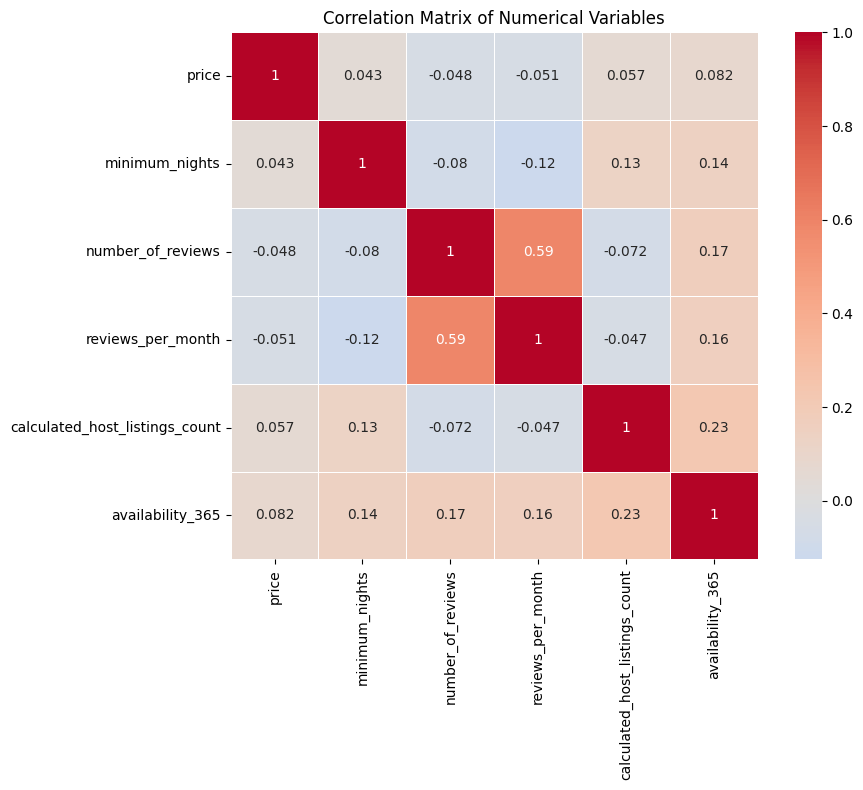

In [ ]:
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

**Scatter plots for various correlations**

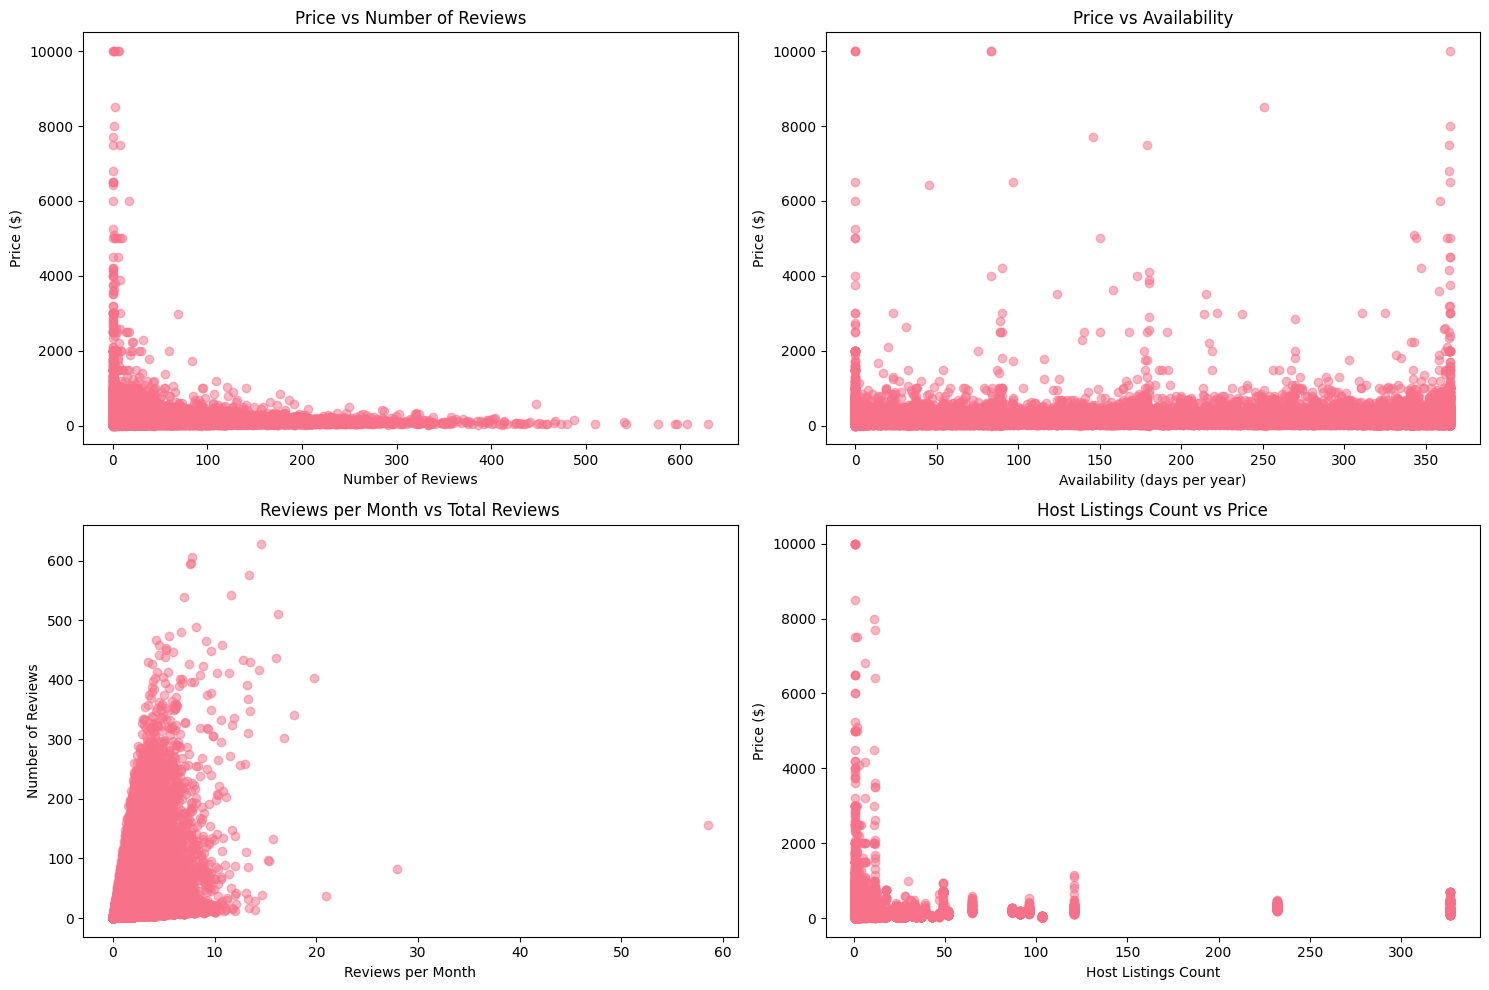

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Price vs Reviews
axes[0, 0].scatter(df['number_of_reviews'], df['price'], alpha=0.5)
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].set_title('Price vs Number of Reviews')

# Price vs Availability
axes[0, 1].scatter(df['availability_365'], df['price'], alpha=0.5)
axes[0, 1].set_xlabel('Availability (days per year)')
axes[0, 1].set_ylabel('Price ($)')
axes[0, 1].set_title('Price vs Availability')

# Reviews vs Reviews per Month
axes[1, 0].scatter(df['reviews_per_month'], df['number_of_reviews'], alpha=0.5)
axes[1, 0].set_xlabel('Reviews per Month')
axes[1, 0].set_ylabel('Number of Reviews')
axes[1, 0].set_title('Reviews per Month vs Total Reviews')

# Host listings vs Price
axes[1, 1].scatter(df['calculated_host_listings_count'], df['price'], alpha=0.5)
axes[1, 1].set_xlabel('Host Listings Count')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].set_title('Host Listings Count vs Price')

plt.tight_layout()
plt.show()

## Geographic Analysis

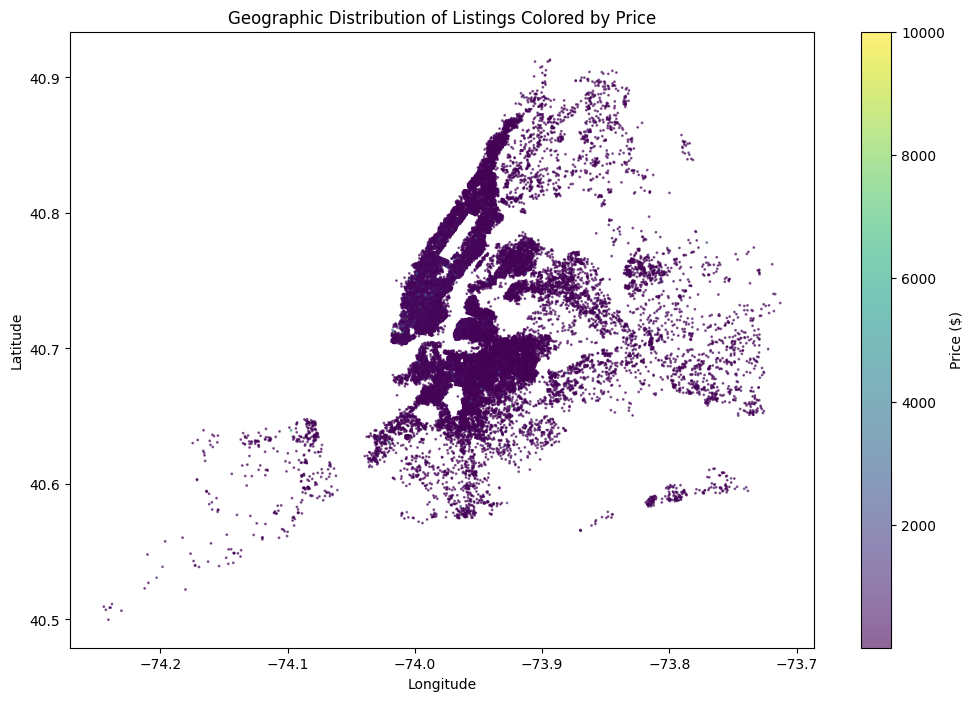

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'],
                     c=df['price'], cmap='viridis', alpha=0.6, s=1)
plt.colorbar(scatter, label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Distribution of Listings Colored by Price')
plt.show()

## Host Analysis

**Top 10 Hosts by Number of Listings**

In [ ]:
host_stats = df.groupby('host_id').agg({
    'id': 'count',  # number of listings per host
    'price': 'mean',  # average price per host
    'number_of_reviews': 'sum'  # total reviews per host
}).rename(columns={'id': 'listings_count', 'price': 'avg_price', 'number_of_reviews': 'total_reviews'})

top_hosts = host_stats.nlargest(10, 'listings_count')
top_hosts

listings_count   avg_price  total_reviews
host_id                                             
219517861             327  253.195719           1281
107434423             232  303.150862             29
30283594              121  277.528926             65
137358866             103   43.825243             87
12243051               96  213.031250             43
16098958               96  208.958333            138
61391963               91  146.241758            417
22541573               87  215.436782             55
200380610              65  290.230769              1
1475015                52  103.076923            162

**Distribution of listings per host**

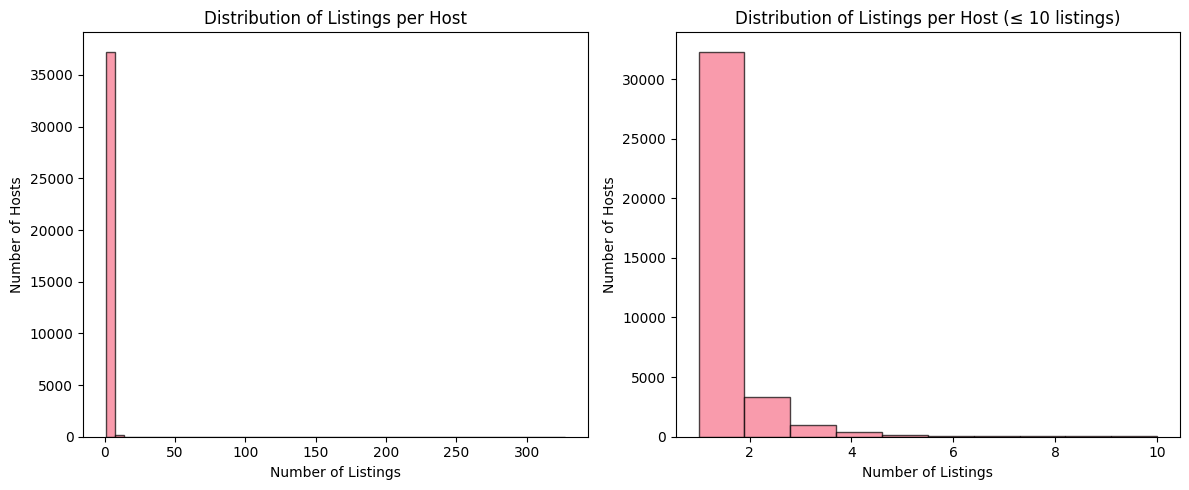

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(host_stats['listings_count'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts')

plt.subplot(1, 2, 2)
plt.hist(host_stats[host_stats['listings_count'] <= 10]['listings_count'],
         bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Listings per Host (≤ 10 listings)')
plt.xlabel('Number of Listings')
plt.ylabel('Number of Hosts')

plt.tight_layout()
plt.show()

## Detailed analysis of Manhattan

In [ ]:
manhattan_df = df[df['neighbourhood_group'] == 'Manhattan']

print(f"Manhattan has {len(manhattan_df)} listings ({len(manhattan_df)/len(df)*100:.1f}% of total)")
print(f"Average price in Manhattan: ${manhattan_df['price'].mean():.2f}")
print(f"Median price in Manhattan: ${manhattan_df['price'].median():.2f}")

Manhattan has 21660 listings (44.3% of total)
Average price in Manhattan: $196.88
Median price in Manhattan: $150.00


**Top neighborhoods in Manhattan by number of listings**

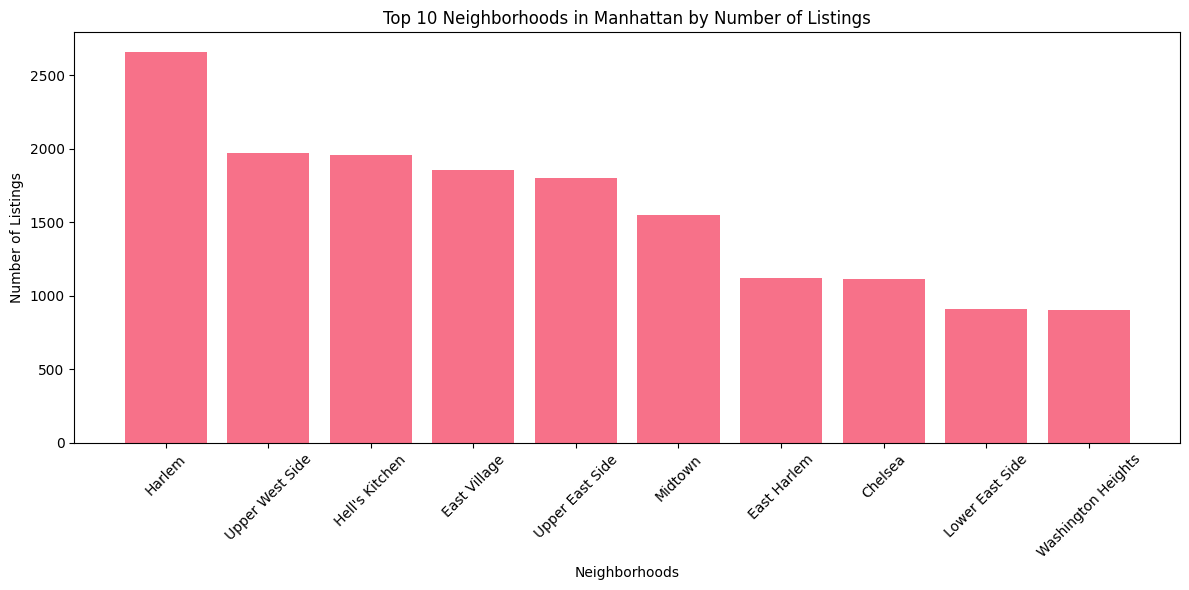

In [ ]:
top_manhattan_neighborhoods = manhattan_df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_manhattan_neighborhoods)), top_manhattan_neighborhoods.values)
plt.title('Top 10 Neighborhoods in Manhattan by Number of Listings')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Listings')
plt.xticks(range(len(top_manhattan_neighborhoods)), top_manhattan_neighborhoods.index, rotation=45)
plt.tight_layout()
plt.show()

**Import the geographic libraries**

In [ ]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import gaussian_kde
from sklearn.cluster import KMeans

In [ ]:
nyc_center = [40.7589, -73.9851]  # NYC coordinates
m = folium.Map(location=nyc_center, zoom_start=11, tiles='OpenStreetMap')

heat_data = [[row['latitude'], row['longitude'], row['price']]
             for idx, row in df.iterrows() if pd.notna(row['latitude']) and pd.notna(row['longitude'])]

HeatMap(heat_data, radius=8, blur=10, max_zoom=1).add_to(m)

m

In [ ]:
price_ranges = [
    ('Budget', 0, 100),
    ('Mid-range', 100, 300),
    ('Luxury', 300, float('inf'))
]

m_layers = folium.Map(location=nyc_center, zoom_start=11)

for i, (name, min_price, max_price) in enumerate(price_ranges):
    if max_price == float('inf'):
        filtered_df = df[(df['price'] >= min_price)]
    else:
        filtered_df = df[(df['price'] >= min_price) & (df['price'] < max_price)]

    heat_data = [[row['latitude'], row['longitude']]
                 for idx, row in filtered_df.iterrows()
                 if pd.notna(row['latitude']) and pd.notna(row['longitude'])]

    if len(heat_data) > 0:
        heat_layer = folium.FeatureGroup(name=f'{name} (${min_price}-${max_price if max_price != float("inf") else "∞"})')
        HeatMap(heat_data, radius=10, blur=15).add_to(heat_layer)
        heat_layer.add_to(m_layers)

folium.LayerControl().add_to(m_layers)
m_layers

## Interactive Choropleth Maps with Plotly

**Create neighborhood-level statistics for choropleth mapping**

In [ ]:
neighborhood_stats = df.groupby(['neighbourhood_group', 'neighbourhood']).agg({
    'price': ['mean', 'median', 'count'],
    'number_of_reviews': 'mean',
    'latitude': 'mean',
    'longitude': 'mean'
}).round(2)

# Flatten column names
neighborhood_stats.columns = ['avg_price', 'median_price', 'listing_count', 'avg_reviews', 'lat', 'lon']
neighborhood_stats = neighborhood_stats.reset_index()

# Filter neighborhoods with at least 10 listings
neighborhood_stats_filtered = neighborhood_stats[neighborhood_stats['listing_count'] >= 10]

print(f"Analyzing {len(neighborhood_stats_filtered)} neighborhoods with ≥10 listings")

Analyzing 167 neighborhoods with ≥10 listings


**Interactive Plotly scatter map**

In [ ]:
fig = px.scatter_mapbox(
    neighborhood_stats_filtered,
    lat='lat',
    lon='lon',
    size='listing_count',
    color='avg_price',
    hover_name='neighbourhood',
    hover_data={
        'neighbourhood_group': True,
        'avg_price': ':.2f',
        'listing_count': True,
        'avg_reviews': ':.1f'
    },
    color_continuous_scale='Viridis',
    size_max=20,
    zoom=10,
    height=600,
    title='NYC Airbnb: Average Price by Neighborhood (Bubble Size = Number of Listings)'
)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()